# Density estimation: multivariate normal distribution

In [79]:
from arfpy import arf
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from numpy import random
random.seed(seed=2023)

Let's generate some multivariate normal data for which we then try to recapture the joint density with FORDE. We have 2 variables, `var1` and `var2` that each have a variance of 1 and they exhibit a correlation coefficient of 0.8. The mean values for `var1` and `var2` are set to 1 and 5, respectively. As an example, we generate 2000 observations. 

In [80]:
mean = (1, 5)
cov = [[1, 0.8], [0.8, 1]]
df = pd.DataFrame(random.multivariate_normal(mean, cov, (2000, )))
df.columns = ['var1', 'var2']
# resulting data frame has 1000 observations for the 2 variables
df.shape

(2000, 2)

Let's fit the adversarial random forest and estimate the density:

In [81]:
my_arf = arf.arf(x = df)
FORDE = my_arf.forde()

Initial accuracy is 0.6515
Iteration number 1 reached accuracy of 0.3485.


We can now investigate details on the estimated density. We have two continuous variables in the data set, so we can have a look at the estimated parameters by browsing through the `'cnt'` data frame.

What this data frame tells us is the following: 

The first column `tree` indicates the tree in the forest.  Note that there will see parameters for 30 trees because we have used the default value for `num_trees = 30` in the ARF. The second column `nodeid` gives the unique identifier to each leaf (terminal node) in the respective forest. We are interested in those parameters because we know that if the forest has converged, it is reasonable to assume that the variables in those terminal nodes are mutually independent. So to get to the joint density, we can use these univariate densities and apply some basic probability theory instead of having to model the multivariate density directly. 

Recap that we have generated two variables that are named `var1` and`var2`. We have column `variable` indicating for which of the variables the parameters are estimated. Finally, the estimated parameters for the mean (`mean`) and standard deviation (`sd`) are given in respective columns of the table. 

In [82]:

FORDE['cnt'].iloc[:,:5]

,tree,nodeid,variable,mean,sd
0,0,5,var1,-1.094664,0.514677
1,0,5,var2,2.453952,0.325082
2,0,7,var1,-1.044197,0.563873
3,0,7,var2,2.881324,0.039782
4,0,11,var1,-0.776401,0.527718
...,...,...,...,...,...
403,29,716,var2,6.977322,0.331542
404,29,717,var1,3.761665,0.101248
405,29,717,var2,6.639773,0.332960
406,29,718,var1,3.186145,0.629556


Let's generate some data to visualize results. For each new observation, we sample a leaf from the forest, i.e., a `nodeid` from a `tree` in `FORDE['cnt']`. Then, the algorithm plugs in the values for the mean (`mean`) and standard deviation (`sd`) in a truncated normal distribution and samples the new value.

In [83]:
df_syn = my_arf.forge(n = 2000)

Let's plot the resulting data!

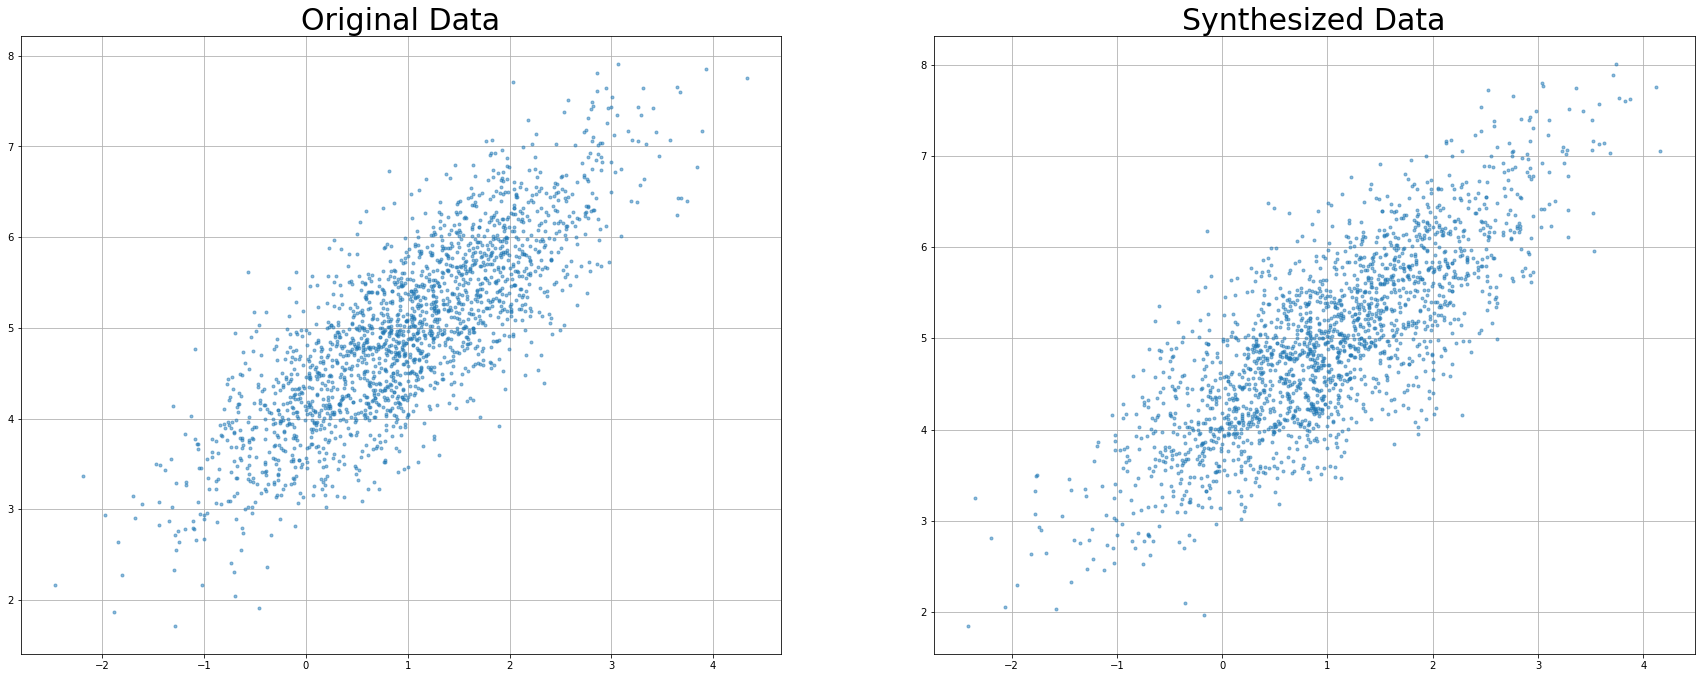

In [84]:
plt.subplot(2, 2, 1)
df_test = df
plt.plot(df.to_numpy()[:, 0], df.to_numpy()[:, 1], '.', alpha=0.5)
plt.grid()
plt.title('Original Data', fontsize = 30)

plt.subplot(2, 2, 2)
plt.plot(df_syn.to_numpy()[:, 0], df_syn.to_numpy()[:, 1], '.', alpha=0.5)
plt.grid()
plt.title('Synthesized Data', fontsize = 30)

plt.rcParams['figure.figsize'] = [30, 25]
plt.show()